# Overview

1. From a simple $\,\pm 1\,$ random walk we create the Wiener process and the Ito process, which are infinitely detailed mathematical objects.

2. With the finite (not infinitely detailed, but cumulated) changes of these mathematical objects the movements stocks are often described.

3. This description has been frequently applied to the pricing of financial derivative products.

4. Only the differential form of the Ito process is discussed below, and only for the example of a financial derivative.

# Probability density


## Definitions 
Consider a list of $\,N\,$ numbers: $\,\left(\,x_1\,,\,x_2\,,\dots,\,x_N\,\right)\,$.

The `histogram` of these numbers is the $\,h\left(\,x\,\right)\,$ function telling for each $\,x\,$ the number of $\,x_i\,$ values equal to $\,x\,$.

The $\,c\left(\,x\,\right)\,$ `cumulated density function (cdf)` tells for each $\,x\,$ the proportion of all $\,x_i\,$ numbers that do not exceed $\,x\,$.

The `discrete` $\,p\left(\,x\,\right)\,$ `probability density function (pdf)` of the $\,x_i\,$ numbers is the proportion of all $\,x_i\,$ values equal to $\,x\,$.<br/>
After taking the $\,N\to\infty\,$ limit the `continuous pdf` becomes $\,p\left(\,x\,\right)=-\,c\,'\left(\,x\,\right)\,$.


Note that the pdf is often called `the distribution`.

The `expectation value` (mean) of a pdf is usually denoted by $\,E\,$ or $\,\mu\,$, and the `volatility` (standard deviation) by $\,\sigma\,$.

## For reference: The normal distribution
The `normal distribution` $-$ also called Gaussian distribution $-$ is
<br/>
$
\displaystyle{p\ (x,\ \mu,\ \sigma)\ =\ \frac{1}{\sigma\ \sqrt{\ 2 \pi\ }}\  \exp \left( \frac{-\,\left(x-\mu\right)^{\ 2}}{2\ \sigma^{\ 2}}\right) }
\,$,
<br/><br/>
and the `standard normal distribution` is defined by $\,\mu=0\,$ and $\,\sigma=1\,$:
<br/>
$\displaystyle{\phi\ (0\ ,1)\ = \frac{1}{\sqrt{\ 2 \pi\ }}\  \exp \left( \frac{ - x^{\ 2}}{2} \right)}\,$.

# Wiener process

## Lévy process

The `Lévy process` is the continuous time version of the discrete-time random walk.

1. Consider the numbers $\,\left(\,x_1\,,\,x_2\,,\dots\,,\,x_N\,\right)\,$ that are selected independently from the same probability density function. Set $\,x_0=0\,$.
2. Select the time step $\,\Delta t=N^{\,-1}\,$, and define the function $\,f_N\,$ by setting
$\,\forall n \in \left(\,0\,,1\,\,\dots\,,\,N\,\right) :$ 
$\,f_N\left(\,n \cdot \Delta t\,\right)=\sum_{\,i\,=\,0}^{\,n}x_i\,$. 
3. If the $\,\lim_{N\to\infty} f_N=f\,$ stochastic function is almost surely continuous everywhere, then this constructed $\,f\,$ is a Lévy process.


## Construct the Wiener process

The `Wiener process` is a subtype of the Lévy process.

1. Generate $\,N\,$ times $\,+1\,$ or $\,-1\,$ with equal $\,1\,\mathit{/}\,\,2\,$ probability. 
2. At each time step consider the sum of the numbers until that time. This is the simplest 1-dimensional random walk.
3. Multiply time by $\,N^{\,-1}\,$.
4. Multiply the function's value by $\,N^{\,-1\,\mathit{/}\,2}\,$.
5. In the $\,N\to\infty\,$ limit this constructed process converges to the Wiener process.

## The series of approximations leading to the Wiener process

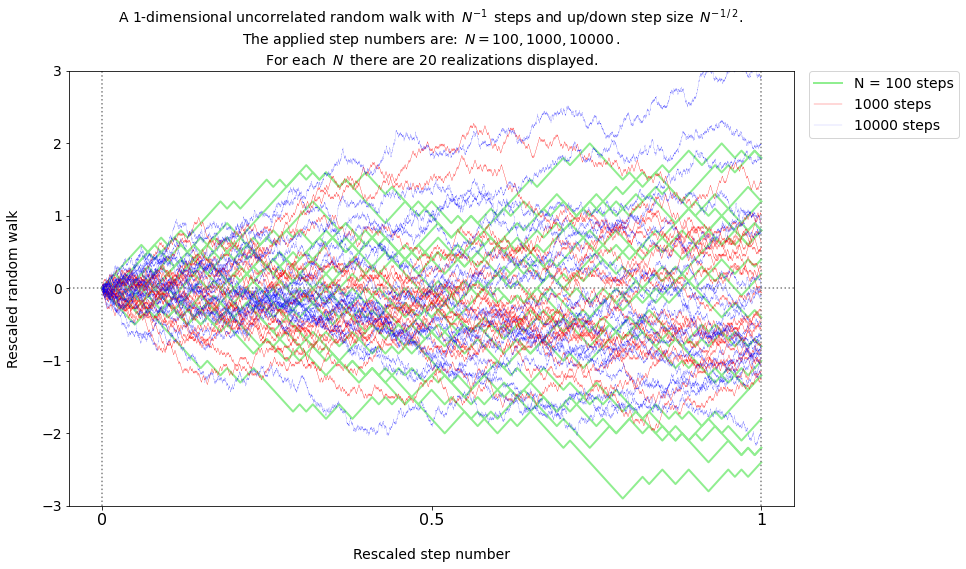

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numbers import Number
from time import time

N_STEP_LIST = 100, 1000, 10000
COLOR_LIST = 'lightgreen', 'red', 'blue'
LINE_WIDTH_LIST = 2.0, 0.3, 0.1
N_REALIZATIONS = 20
YLIMITS = -3, 3
MY_FONTSIZE = 14
LABEL_PAD = 20
RANDOM_SEED = 1234


def wiener_discrete_approximation(n_steps=None, rnd_seed=None):
    """
    Rescaled N-step +1/-1 random walk to approximate the Wiener process
    Note: the returned array has n + 1 items, becuase it includes the t=0 item
    """
    if rnd_seed is not None:
        np.random.seed(rnd_seed)
    
    random_steps = [0.0]
    random_steps.extend([1.0 if i == 1 else -1.0 for i in np.random.randint(0, high=2, size=n_steps)])

    return [x / np.sqrt(n_steps) for x in np.cumsum(random_steps)]


def plot_wiener_discrete_approx(n_step_list=None, color_list=None, line_width_list=None, n_realizations=None):
    """
    Plot discrete approximations of the Wiener process
    """

    # --- checking and setting values ---
    assert isinstance(n_step_list, (list, tuple)), 'n_step_list has to be a list or tuple'
    assert isinstance(n_step_list[0], Number), 'n_step_list must contain numbers'
    assert isinstance(color_list, (list, tuple)), 'color_list has to be a list or tuple'
    assert isinstance(n_realizations, int), 'n_realizations must be an integer'
    assert isinstance(line_width_list, (list, tuple)), 'line_width_list has to be a list or tuple'
    
    my_fontsize = 16
    figure_size = (13, 8)
    labelpad = 20
    xtic_positions = 0, 0.5, 1
    
    # --- plotting ---
    plt.figure(figsize=figure_size)
    for step_index, (color, n_steps, line_width) in enumerate(zip(color_list, n_step_list, line_width_list)):
        for i_realization in range(n_realizations):
            plt.plot(np.linspace(0, 1.0, n_steps + 1), 
                     wiener_discrete_approximation(n_steps=n_steps), linestyle='-',
                     label=(('N = ' if step_index == 0 else '') + '{} steps'.format(n_steps) 
                            if 0 == i_realization else None), color=color, lw=line_width)

    plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0., fontsize=MY_FONTSIZE)

    plt.title('A 1-dimensional uncorrelated random walk with ' +
              r'$\,N^{-1\,}$' + ' steps and up/down step size ' + r'$\,N^{-1\,\mathit{/}\,2}$. ' + '\n' +
              'The applied step numbers are: ' + r'$\,N=' + '{}'.format(', '.join([str(_) for _ in n_step_list])) +
              r'\,$.' + '\n' + r'For each $\,N\,$ there are ' + 
              '{} realizations displayed.'.format(n_realizations), fontsize=MY_FONTSIZE)
    plt.xlabel('Rescaled step number', fontsize=MY_FONTSIZE, labelpad=LABEL_PAD)
    plt.ylabel('Rescaled random walk', fontsize=MY_FONTSIZE, labelpad=LABEL_PAD)
    plt.tick_params(labelsize=MY_FONTSIZE)
    plt.axhline(0, c='gray', ls='dotted')
    plt.axvline(0, c='gray', ls='dotted')
    plt.axvline(1, c='gray', ls='dotted')
    plt.ylim(YLIMITS)
    
    ax = plt.gca()
    ax.set_xticks(xtic_positions)
    ax.set_xticklabels([str(_) for _ in xtic_positions], fontsize=my_fontsize) 

    plt.show()


plot_wiener_discrete_approx(n_step_list=N_STEP_LIST, color_list=COLOR_LIST, line_width_list= LINE_WIDTH_LIST, 
                            n_realizations=N_REALIZATIONS)

## Related definitions and properties

### Self-similarity

Consider an $\,n$ - dimensional space where $\,n\,$ is any positive number, and in this space consider a set of points.

This set of points is `self-similar` if its homogeneous expansion or shrinking results in a set with statistically identical properties.

Examples of self-similar objects: snowflakes, clouds, coastlines.

Notes:<br/>
1. "homogeneous" is also called isotropic, in other words, the same factor is used in all directions
2. usually, self-similarity is meant to describe objects that do not fill the embedding space, for example, not a full disc
3. for actual observed objects, the expansion / shrinking factor has limits, for example, 3 or 4 orders magnitude

### Self-affinity

An $\,n$ - dimensional object is `self-affine` if an `inhomogeneous` shrinking / expansion makes the object statistically similar to itself.

Examples of self-affine objects: surface grown by ballistic deposition, the Wiener process.

Note that
"inhomogenous" is also called anistropic, in other words, different factors are used in different directions.

### Hurst exponent

If a 2-dimensional curve can be mapped to itself by simultanously rescaling it with any $\,A>0\,$ factor in the horizontal direction
<br/>
and with $\,A^{\mathrm{H}}\,$ in the vertical direction, then the $\,\mathrm{H}\,$ is called the Hurst exponent of this curve.

`The graph of the Wiener process is self-affine and its Hurst exponent is 1/2`.

## Properties of the Wiener process

Note that the Wiener process is a mathematical object. 

Remember that mathematical constructs are approximations of real objects.

### Scaling exponents
From the analysis of random walks it is known that
the expected distance of a random walk from the origin (the $\,0\,$ value)<br/>
is proportional to the square root of the number of steps.
This property remains in the $\,N\to\infty\,$ limit.
<br/><br/>
Therefore, the Wiener process $-$ as a geometrical object $-$ is unchanged if at the same time
<br/>
it is magnified by a factor of $\,A>0\,$ horizontally and $\,A^{\,1\,\mathit{/}\,2}\,$ vertically. 

### PDF of finite short time increments

Increments of the Wiener process taken over same sized non-overlapping finite time intervals are
<br/>
independent, and $-$ based on the Central Limit Theorem $-$ they are `normally distributed`.

## Differential form of the Wiener process

During an infinitesimally short time interval, $\,dt\,$, the Wiener process changes by $\,dz\,$.

Note the difference between `finite short` and `infinitesimally small`:
1. The finite short $\,\Delta t\,$ is a fixed short time step, for example, 0.001s.
2. All statements containing the infinitesimally small $\,dt\,$ tell something about the $\,\Delta t\to 0\,$ limiting case.

The meaning and usefulness of the $\,\Delta t\to 0\,$ limit:

1. There is always a minimal meaningful value of $\,\Delta t\,$,
and so the $\,\Delta t\to 0\,$ limit cannot be taken in the exact mathematical sense.
2. However, for `calculations` the $\,\Delta t\to 0\,$ limit is very useful, because often it allows one to complete a calculation quickly.

### Finite time differences

Consider a `finite small` small $\,\Delta t\,$ time step.
During this time the signed change of the Wiener process is $\,\Delta z\,$.<br/>
Note that here $\,\Delta t\,$ is a fixed positive number, while $\,\Delta z\,$ is a stochastic real value.

We saw that the graph of the Wiener process is self-affine with `Hurst exponent 1/2`, therefore, 
<br/>
in the $\,\Delta t\to 0\,$ limit the expectation value of the stochastic ratio 
$\,\left(\Delta z\right)^{\,2}\,\mathcal{/}\,\Delta\,t\,$ converges to a constant positive number.

An alternative way of saying the same thing is the following: 
$\,\left(\Delta z\right)^{\,2}\,$ `scales as` $\,\Delta\,t\,$.

### Ito process: a generalized Wiener process

Denote the Ito process by $\,x\left(\,t\,\right)\,$. 
<br/>
To define this process, first consider the two functions 
$\,a\,\left(\,x\left(\,t\,\right)\,,\,t\,\right)\,$ 
and $\,b\,\left(\,x\left(\,t\,\right)\,,\,t\,\right)\,$.

During the infinitesimally short $\,dt\,$ time interval the `Ito process`, 
$\,x\left(\,t\,\right)\,$, changes by

$$dx = a\left(\,x\left(\,t\,\right)\,,\,t\,\right)\,dt \,\, + \,\, b\left(\,x\left(\,t\,\right)\,,\,t\,\right)\,dz\,.$$

In `the simplest case` both functions are constant: $\,a = \mathrm{const}\,$ and $\,b = \mathrm{const}\,$,
and they are called `drift` and `volatility`.



## Illustration of the generalized Wiener process with constant drift and volatility
A finite $\,\Delta t\,$ value approximation is used below to illustrate the generalized Wiener process with constant drift and volatility.

##### Notations
1. Denote the drift by the Greek letter $\,\mu\,$.
2. Denote the volatility by the Greek letter $\,\sigma\,$.


##### Tasks
1. Change the number of instances of the random walk and observe the distribution of their end points.
2. How many paths do you expect to see above the upper $\,2\,\sigma\,$ curve ? How many below the lower $\,2\,\sigma\,$ curve ?

##### Help to the Tasks
The normal distribution is symmetric and it has $\,2.2\%\,$ of its total area below $\,\mu-\,2\,\sigma\,$.

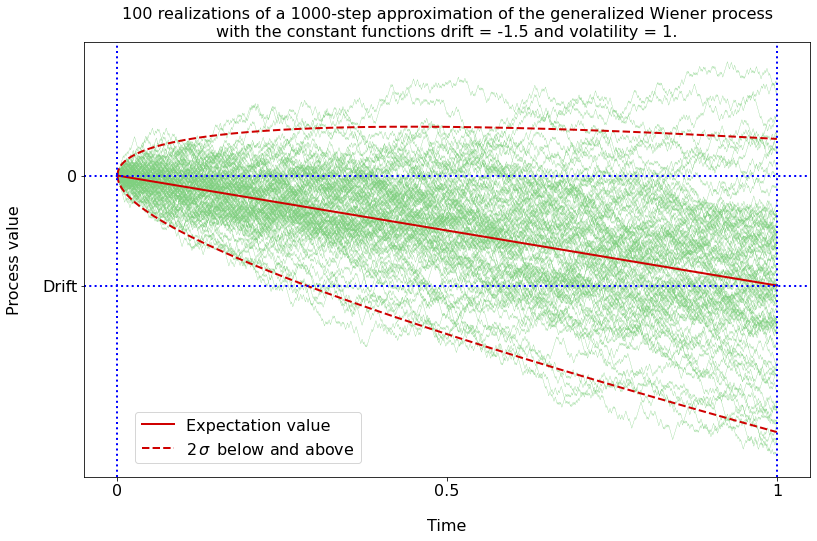

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

N_STEPS = 1000
N_REALIZATIONS = 100
DRIFT = -1.5
VOLATILITY = 1
FIGURE_SIZE = (13, 8)
MY_FONTSIZE = 16
AXIS_LINE_COLOR = '#0000ff'
GUIDE_LINE_COLOR = '#cf0000'
GUIDE_LINE_WIDTH = 2
LABEL_PAD = 20
PLOT_LINE_WIDTH = 0.3
PLOT_LINE_COLOR = '#80d080'


def generalized_wiener_discrete_approximation(n_steps=None, drift=None, vol=None):
    """
    Rescaled N-step +1/-1 random walk to approximate the generalized Wiener process with constant drift and volatility.
    """
    return [1.0 * drift * i / n_steps + vol * z for i, z in enumerate(wiener_discrete_approximation(n_steps=n_steps))]


def plot_generalized_wiener_approx_drift_vol(n_steps=None, n_realizations=None, drift=None, vol=None):
    """
    A finite time-step approximation (illustration) of the generalized Wiener process with constant drift and volatility.
    """
    plt.figure(figsize=FIGURE_SIZE)
    time_points = np.linspace(0, 1, n_steps + 1)
    for index_of_realization in range(n_realizations):
        plt.plot(time_points, generalized_wiener_discrete_approximation(n_steps=n_steps, drift=drift, vol=vol),
                 color=PLOT_LINE_COLOR, lw=PLOT_LINE_WIDTH)

    f_line = [drift * t for t in time_points]
    f_2_sigma = [2.0 * vol * np.sqrt(t) for t in time_points]
    plt.plot(time_points, f_line, color=GUIDE_LINE_COLOR, lw=GUIDE_LINE_WIDTH, ls ='-', label='Expectation value')
    plt.plot(time_points, np.add(f_line, f_2_sigma), 
             color=GUIDE_LINE_COLOR, lw=GUIDE_LINE_WIDTH, ls ='--', label='$2\,\sigma\,$ below and above')
    plt.plot(time_points, np.subtract(f_line, f_2_sigma), color=GUIDE_LINE_COLOR, lw=GUIDE_LINE_WIDTH, ls ='--')
    plt.axhline(0, c=AXIS_LINE_COLOR, ls=':', lw=GUIDE_LINE_WIDTH)
    plt.axhline(drift, c=AXIS_LINE_COLOR, ls=':', lw=GUIDE_LINE_WIDTH)
    plt.axvline(0, c=AXIS_LINE_COLOR, ls=':', lw=GUIDE_LINE_WIDTH)
    plt.axvline(1, c=AXIS_LINE_COLOR, ls=':', lw=GUIDE_LINE_WIDTH)
    plt.xlabel('Time', fontsize=MY_FONTSIZE, labelpad=LABEL_PAD)
    plt.ylabel('Process value', fontsize=MY_FONTSIZE, labelpad=LABEL_PAD)
    plt.title('{} realizations of a {}-step approximation of the generalized Wiener process\n'
              .format(n_realizations, n_steps) +
              'with the constant functions drift = {} and volatility = {}.'.format(drift, vol), fontsize=MY_FONTSIZE)
    plt.legend(bbox_to_anchor=(0.07, 0.15), loc=2, borderaxespad=0., fontsize=MY_FONTSIZE)

    ax = plt.gca()
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0', '0.5', '1'], fontsize=MY_FONTSIZE)
    ax.set_yticks([0, drift])
    ax.set_yticklabels(['0', 'Drift'], fontsize=MY_FONTSIZE)

    plt.show()
    
    
plot_generalized_wiener_approx_drift_vol(n_steps=N_STEPS, n_realizations=N_REALIZATIONS, drift=DRIFT, vol=VOLATILITY)

# Ito process

##### Definitions
As mentioned above, the Ito process is a generalization of the Wiener process.<br/>
It is named after the Japanese mathematician Kiyoshi Itô.

1. The Ito process is a stochastic function. Denote it by $\,x\left(\,t\,\right)\,$. 
2. Denote the Wiener process by $\,z\left(\,t\,\right)\,$.
3. Consider also the two deterministic functions $\,a\,\left(\,x\left(\,t\,\right)\,,\,t\,\right)\,$ 
and $\,b\,\left(\,x\left(\,t\,\right)\,,\,t\,\right)\,$.

The change of the Wiener process during an infinitesimally short time interval is $\,dz\,$.

##### Ito process

The change of the Ito process, $\,dx\,$, during an infinitesimally short $\,dt\,$ time interval is the sum of two terms:

$${\displaystyle dx = a\left(x,t\right)\,dt + b\left(x,t\right)\,dz\,.}$$

## Ito's Lemma on the example of a derivative product

It has been observed that over short time intervals the distribution of a stock price's logarithmic return is close to normal.
<br/>
Based mainly on this observation, stock rate of return (log return over infinitesimally short times) is often modelled as an Itô process.

As before, denote the stock price by $\,S\left(\,t\,\right)\,$. The change of the stock price over an infinitesimally short $\,dt\,$ time interval is $\,dS\,$.
<br/>
Denote the logarithm of the stock price by $\,x\left(\,t\,\right)\,$.

With these notations the `rate of return` of the stock is $\,dx=dS\,\mathcal{/}\,S\,$.
<br/>
In other words, $\,dx\,$ is the relative return of the stock over the infinitesimally short $\,dt\,$ time.

### Stock price described as an Ito process 
In the definition of the Ito process set a constant drift and a constant volatility: $\ a\left(x,t\right)=\mu\ $ and $\ b\left(x,t\right)=\sigma\ $. 

After inserting $\,dx=dS\,\mathcal{/}\,S\,$ and multiplying both sides by $\,S\,$ the change of the stock price over $\,dt\,$ time is 

$$dS=\mu\ S\ dt+\sigma\ S\ dz\,.$$

### Taylor expansion up to the linear terms

##### Definitions
Denote the price of the financial derivative product by $\,f\left(\,S,\,t\,\right)\,$.
<br/>
For the following we will need the assumption that $\,f\,$ is twice differentiable.

##### Taylor expansion

During the `finite short` $\ \Delta\,t\ $ time interval the stock price changes by $\,\Delta\,S\,$ and the derivative product's price changes by $\,\Delta\,f\,$.
<br/>
Let us apply the Taylor expansion to this small $\,\Delta\,f\,$ up to the second derivative terms:

$$\Delta\,f \,=\, \frac{\partial\,f}{\partial\,S}\,\Delta\,S \,+\, \frac{\partial\,f}{\partial\,t}\,\Delta\,t \,+\, \frac{1}{2}\ \frac{\partial^{\,2}\,f}{\partial\,S^{\,2}}\,\left(\,\Delta\,S\,\right)^{\ 2} \,+\, \frac{\partial^{\,2}\,f}{\partial\,S\,\,\partial\,t}\,\left(\,\Delta\,S\,\right)\,\left(\,\Delta\,t\,\right) \,+\, \frac{1}{2}\ \frac{\partial^{\,2}\,f}{\partial\,t^{\ 2}}\,\left(\,\Delta\,t\,\right)^{\,2} \,+\,\cdots$$

##### Replace $\,\left(\,\Delta\,S\,\right)^{\,2}\,$ in the $\,\Delta\,t\to 0\,$ limit and keep only linear terms

(1) At the "simple" Wiener process we have seen that in the $\,\Delta\,t\to 0\,$ limit 
<br/>
the expectation value of the stochastic ratio 
$\,\left(\Delta z\right)^{\,2}\,\mathcal{/}\,\Delta t\,$ converges to a constant positive number.


(2) According to the $\,dS=\mu\ S\ dt + \sigma\ S\ dz\,$ equation, if only $\,dz\,$ changes, then $\,\sigma\ S\ \Delta z\,$ is equivalent to $\,\Delta S\,$.


(3) From (1) and (2) we get that  $\,\left(\,\Delta\,S\,\right)^{\,2}$ can be replaced with  $\,\sigma^{\,2}\,S^{\,2}\,\Delta\,t\,$ in the $\,\Delta\,t\to 0\,$ limit.


(4) The terms $\,\left(\,\Delta\,S\,\right)\,\left(\,\Delta\,t\,\right)\,$ and $\,\left(\,\Delta\,t\,\right)^{\,2}\,$, and all later terms are functions of $\,\Delta\,t\,$ with exponents above $\,1\,$.


(5) From (4) it follows that in the $\,\Delta\,t\to 0\,$ limit 
  * we should replace $\,\left(\,\Delta\,S\,\right)^{\,2}$ with $\,\sigma^{\,2}\,S^{\,2}\,\Delta\,t\,$
  * and keep only those terms that are at most linear in either $\,\Delta\,t\,$ or $\,\Delta\,S\,$

$$\Delta\,f \,=\, \frac{\partial\,f}{\partial\,S}\,\Delta\,S \,+\, \frac{\partial\,f}{\partial\,t}\,\Delta\,t \,+\, \frac{1}{2}\ \frac{\partial^{\,2}\,f}{\partial\,S^{\,2}}\,\sigma^{\,2}\,S^{\,2}\,\Delta\,t\,$$.


(6) Moreover, when the $\,\Delta\,t\to 0\,$ limit is performed,
<br/>
each finite small change is replaced by the corresponding infinitesimally small change:

$$df \,=\, \frac{\partial\,f}{\partial\,S}\,dS \,+\, \frac{\partial\,f}{\partial\,t}\,dt \,+\, \frac{1}{2}\ \frac{\partial^{\,2}\,f}{\partial\,S^{\,2}}\,\sigma^{\,2}\,S^{\,2}\,dt\,.$$


##### Replace $\,dS\,$ by applying the Ito process of the underlying asset

Finally, replace $\,d\,S\,$ with $\,\mu\,S\,dt+\sigma\,S\,dz\,$ to obtain

$$df \,=\,  \left(\,\frac{\partial\,f}{\partial\,t} \,+\, \frac{\partial\,f}{\partial\,S}\,\mu\,S \,+\, \frac{1}{2}\,\frac{\partial^{\,2}\,f}{\partial\,S^{\,2}}\,\sigma^{\,2}\,S^{\,2}\right)\,dt \,+\, \frac{\partial\,f}{\partial\,S}\ \sigma\ S\ dz\,.$$

This is the `differential form of Ito's Lemma` for the $\,f\left(\,S,\,t\,\right)\,$ price of a financial derivative product when<br/>
 the value of the underlying asset is $\,S\left(\,t\,\right)\,$ with volatility $\,\sigma\,$. 
The change $\,dz\,$ is generated by the Wiener process.

### Note: a smooth function of an Ito process is also an Ito process

In the above case, with the linear terms of the Taylor series, and the $\,H=1\,\mathit{/}\,2\,$ property we found an Ito process for the deriveative product.
<br/>
Is it true in general that an Ito process of the underlying implies an Ito process for the derivative product?

As before, $\,a\left(\,x,\,t\,\right)\,$ and $\,b\left(\,x,\,t\,\right)\,$ are two functions and 
$\,x\left(\,t\,\right)\,$ is an Ito process: $\,dx = a\left(x,t\right) dt + b\left(x,t\right) dz\,$.


Let $\,f\left(\,x\,\right)\,$ be a smooth function (continuously differentiable).
<br/>
The change of $\,f\left(\,x\,\right)\,$ within the infinitesimally short $\,dt\,$ time is $\,df = f{\,'}\left(\,x\,\right)\,dx\,$.


Insert into this equation of $\,df\,$ the $\,dx\,$ value from above to obtain:

$$df = \left(\,f{\,'}\left(\,x\,\right) + a\left(\,x,\,t\,\right)\,\right)\,dx \,+\, b\left(\,x,\,t\,\right)\ dz\,.$$

In summary, $\,f\left(\,x\,\right)\,$ `is an Ito process` with the coefficent functions $\,f{\,'}\left(\,x\,\right) + a\left(\,x,\,t\,\right)\,\,$ and $\,\,b\left(\,x,\,t\,\right)\,$.

### Mean reverting processes

#### Ornstein–Uhlenbeck process

Let $\,\tau\,$ and $\,\sigma\,$ be constant numbers, and let the coefficient functions be
$\,a\left(\,x,\,t\,\right) = -\,x\left(\,t\,\right)\,\mathit{/}\,\tau\,$ and $\,b\left(\,x,\,t\,\right)=\sigma\,$.
<br/>
With these the Ito process becomes a `mean reverting process`:

$$\,dx = -\,\frac{1}{\tau}\ x\left(\,t\,\right)\ dt \,+\, \sigma\ dz\,.$$

#### Vasicek process

Let $\,x_{\,0}\,$ also be a constant number, and add the $\,\displaystyle{\frac{x_{\,0}}{\tau}}\,$ `constant drift` to the first term of the right hand side.
<br/>
This will cause reversion to the constant $\,x_{\,0}\,$ value:

$$\,dx = \frac{1}{\tau}\,\Big(x_{\,0} - x\left(\,t\,\right)\!\Big)\,dt \,+\, \sigma\ dz\,.$$


###### Plotting the Vasicek process (discrete approximation)

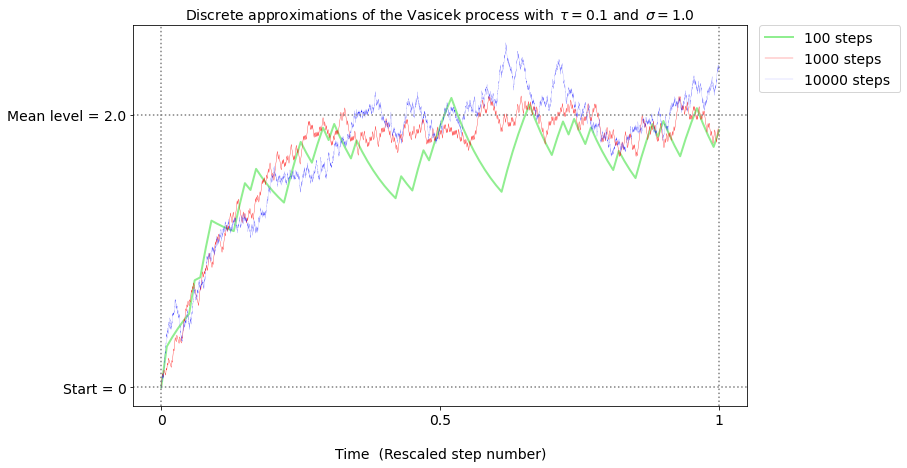

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

N_STEP_LIST = 100, 1000, 10000
COLOR_LIST = 'lightgreen', 'red', 'blue'
LINE_WIDTH_LIST = 2.0, 0.3, 0.1
MEAN_LEVEL = 2.0  # constant level to return to
TAU = 0.1  # time constant of reversion to mean
VOLATILITY = 1.0
FIGURE_SIZE = (11, 7)
MY_FONTSIZE = 14
RANDOM_SEED = 1234
XTIC_POSITIONS = 0, 0.5, 1
LABEL_PAD = 20


def vasicek_process(n_steps=None, mean_level=None, tau=None, vol=None, rnd_seed=None):
    """
    Discrete approximation of the Vasicek process with the selected mean reversion level, tau and volatility.
    """
    if rnd_seed is not None:
        np.random.seed(rnd_seed)

    delta_t = 1.0 / n_steps
    x = [0.0]
    for delta_z in (1 - 2 * np.random.randint(0, high=2, size=n_steps)) / np.sqrt(n_steps):
        x_now = x[-1]
        x_next = x_now + (mean_level - x_now) / tau * delta_t + vol * delta_z
        x.append(x_next)
            
    return x


def plot_vasicek(mean_level=None, tau=None, vol=None):
    """
    Discrete approximations of the Vasicek process (Vasicek model) with the selected parameters
    """

    plt.figure(figsize=FIGURE_SIZE)
    for color, n_steps, line_width in zip(COLOR_LIST, N_STEP_LIST, LINE_WIDTH_LIST):
        plt.plot(np.linspace(0, 1.0, n_steps + 1), 
                 vasicek_process(n_steps=n_steps, mean_level=mean_level, tau=tau, vol=vol), 
                 linestyle='-', label='{} steps '.format(n_steps), color=color, lw=line_width)

    plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0., fontsize=MY_FONTSIZE)
    plt.title('Discrete approximations of the Vasicek process ' +
              r'with $\,\tau=${} and $\,\sigma=${}'.format(tau, vol), fontsize=MY_FONTSIZE)
    plt.xlabel('Time  (Rescaled step number)', fontsize=MY_FONTSIZE, labelpad=LABEL_PAD)
    plt.tick_params(labelsize=MY_FONTSIZE)
    plt.axhline(0, c='gray', ls='dotted')
    plt.axhline(mean_level, c='gray', ls='dotted')
    plt.axvline(0, c='gray', ls='dotted')
    plt.axvline(1, c='gray', ls='dotted')
    
    ax = plt.gca()
    ax.set_yticks([0, mean_level])
    ax.set_yticklabels(['Start = 0', 'Mean level = {}'.format(mean_level)], fontsize=MY_FONTSIZE) 
    ax.set_xticks(XTIC_POSITIONS)
    ax.set_xticklabels([str(x) for x in XTIC_POSITIONS], fontsize=MY_FONTSIZE) 

    plt.show()

    
plot_vasicek(mean_level=MEAN_LEVEL, tau=TAU, vol=VOLATILITY)

# Recommended reading

H. Kleinert: Path Integrals
<br/>
Chapter 20: Path Integrals and Financial Markets
<br/>
http://users.physik.fu-berlin.de/~kleinert/b5/psfiles/pthic20.pdf